## Heart Disease Prediction using Traditional Machine Learning vs CatBoost

This project investigates how various machine learning models perform in predicting heart disease using structured clinical data. We compare traditional algorithms, Logistic Regression, K-Nearest Neighbors, and Random Forest with CatBoost, a modern gradient boosting method known for its high accuracy on tabular data and native handling of categorical variables. Our objective is to evaluate the trade-offs between simplicity, interpretability, and predictive power to identify the most effective approach for this healthcare application.

We'll follow a step-by step data science pipeline

## 1. Problem Definiton 

The objective of this project is to predict whether a patient has heart disease using clinical and physiological features.

Heart disease continues to be one of the leading causes of death globally. Accurate early detection through machine learning can support clinicians in identifying high-risk individuals, personalizing treatment strategies, and ultimately saving lives.

In this study, we build and compare a range of machine learning models, both traditional and modern, to evaluate which approach delivers the most accurate, reliable, and practical predictions for this critical healthcare challenge.

## 2. Data Collection 

The dataset used in this project originates from the Cleveland Heart Disease dataset, one of the most well-known benchmarks for binary classification in healthcare. The original version is hosted by the https://archive.ics.uci.edu/ml/datasets/heart+Disease, and a clean, preprocessed version is also available on Kaggle https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset.


## 3. 🧬 Feature Overview: Data Dictionary

Below is a description of the features in the heart disease dataset:

| Feature    | Description                                                                                                                |
| ---------- | -------------------------------------------------------------------------------------------------------------------------- |
| `age`      | Age in years                                                                                                               |
| `sex`      | Sex (1 = male, 0 = female)                                                                                                 |
| `cp`       | Chest pain type:<br>• 0 = Typical angina<br>• 1 = Atypical angina<br>• 2 = Non-anginal pain<br>• 3 = Asymptomatic          |
| `trestbps` | Resting blood pressure (mm Hg) — anything >130-140 is cause for concern                                                    |
| `chol`     | Serum cholesterol in mg/dl — values above 200 may be a concern<br>• Cholesterol = LDL + HDL + 0.2 \* triglycerides         |
| `fbs`      | Fasting blood sugar >120 mg/dl (1 = true; 0 = false) — values >126 may indicate diabetes                                   |
| `restecg`  | Resting electrocardiographic results:<br>• 0 = Normal<br>• 1 = ST-T wave abnormality<br>• 2 = Left ventricular hypertrophy |
| `thalach`  | Maximum heart rate achieved                                                                                                |
| `exang`    | Exercise-induced angina (1 = yes; 0 = no)                                                                                  |
| `oldpeak`  | ST depression induced by exercise relative to rest — reflects heart stress under exercise                                  |
| `slope`    | Slope of peak exercise ST segment:<br>• 0 = Upsloping<br>• 1 = Flat<br>• 2 = Downsloping                                   |
| `ca`       | Number of major vessels (0–3) colored by fluoroscopy — more vessels colored = better blood flow                            |
| `thal`     | Thalium stress test result:<br>• 1,3 = Normal<br>• 6 = Fixed defect<br>• 7 = Reversible defect                             |
| `target`   | Target variable: 1 = Presence of heart disease, 0 = No heart disease                                                       |





## Preparing our tools 
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Freeze authoritative training dataset for security checks
TRAINING_DF = df.copy()


In [4]:
# Check for missing values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# 3. Preprocessing 
X = df.drop("target", axis=1)
y = df["target"]

In [6]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## Train Traditional Model

In this section, we’ll begin training our traditional classification models and evaluate their performance using key classification metrics, along with cross-validation scores. Let’s start by preparing the data through training and testing splits using the code below.

In [8]:
 # Train/ test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standard scaling for tradiitonal models 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# 4. Train Traditional Ml Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

def evaluate_models(models, X_train, X_test, y_train, y_test, scaled=True, verbose=True):
    """
    Trains and evaluates multiple classification models 

    Args:
        models (dict): Model name > estimator pairs
        X_train, X_test: Training and test features
        y_train, y_test: Labels 
        scaled (bool): If True, assumes features are scaled
        verbose (bool): If True, prints CV metrics

    Returns:
        dict: evaluation metrics for each model
    """
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        proba = model.predict_proba(X_test)[:, 1]

        cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring="f1").mean()
        cv_acc = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean()
        cv_recall = cross_val_score(model, X_train, y_train, cv=5, scoring="recall").mean()
        cv_prec = cross_val_score(model, X_train, y_train, cv=5, scoring="precision").mean()
        cv_auc = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc").mean()
       
        results[name] = {
        
           "Accuracy": accuracy_score(y_test, preds),
           "F1 Score": f1_score(y_test, preds),
           "Precision": precision_score(y_test, preds),
           "AUC": roc_auc_score(y_test, proba),
           "Recall": recall_score(y_test, preds),
           "CV F1": cv_f1,
           "CV Accuracy": cv_acc,
           "CV Recall": cv_recall,
           "CV Precision": cv_prec,
           "CV AUC": cv_auc
            
        }

        if verbose:
         print(f"\n{name} Evaluation:")
         print(f" Accuracy:     {accuracy_score(y_test, preds):.4f}")
         print(f" F1 Score:     {f1_score(y_test, preds):.4f}")
         print(f" Precision:    {precision_score(y_test, preds):.4f}")
         print(f" Recall:       {recall_score(y_test, preds):.4f}")
         print(f" AUC:          {roc_auc_score(y_test,proba):.4f}")
         print(f" CV F1:        {cv_f1:.4f}")
         print(f" CV Accuracy:  {cv_acc:.4f}")
         print(f" CV Recall:    {cv_recall:.4f}")
         print(f" CV Precision: {cv_prec:.4f}")
         print(f" CV AUC:       {cv_auc:.4f}")
            

    return results

#Traditional models
traditional_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Run evaluation
traditional_results = evaluate_models(traditional_models, X_train_scaled, X_test_scaled, y_train, y_test)


Logistic Regression Evaluation:
 Accuracy:     0.8525
 F1 Score:     0.8571
 Precision:    0.8710
 Recall:       0.8438
 AUC:          0.9267
 CV F1:        0.8361
 CV Accuracy:  0.8180
 CV Recall:    0.8493
 CV Precision: 0.8273
 CV AUC:       0.8853

KNN Evaluation:
 Accuracy:     0.9016
 F1 Score:     0.9032
 Precision:    0.9333
 Recall:       0.8750
 AUC:          0.9154
 CV F1:        0.8354
 CV Accuracy:  0.8141
 CV Recall:    0.8575
 CV Precision: 0.8203
 CV AUC:       0.8704

Random Forest Evaluation:
 Accuracy:     0.8361
 F1 Score:     0.8438
 Precision:    0.8438
 Recall:       0.8438
 AUC:          0.9224
 CV F1:        0.8243
 CV Accuracy:  0.8058
 CV Recall:    0.8342
 CV Precision: 0.8186
 CV AUC:       0.9036


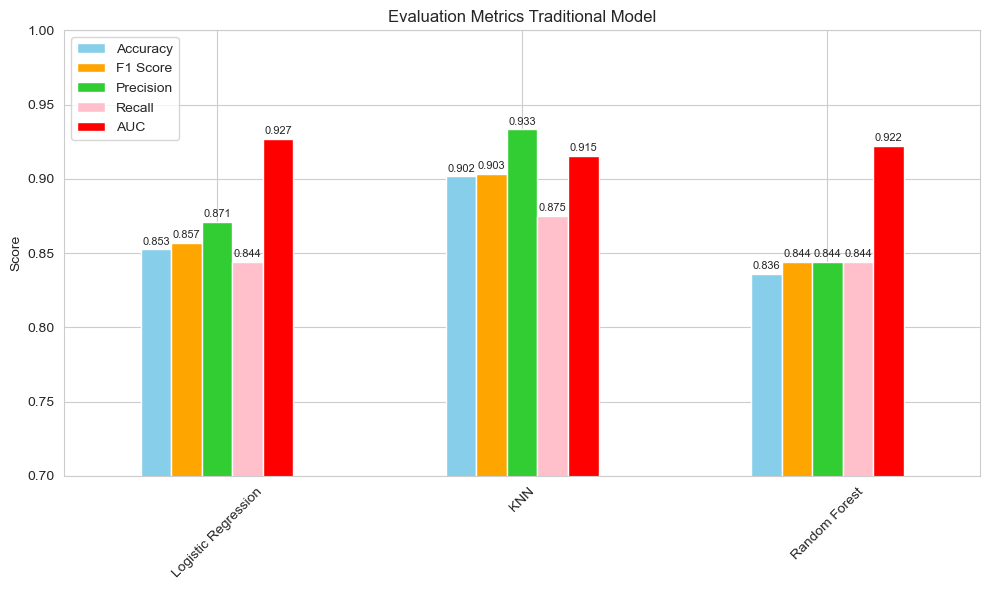

In [11]:
# Evaluation Metrics 

# Format your results dicitionary into a data frame 
results_dict = {
    "Logistic Regression": {
        "Accuracy": 0.8525,
        "F1 Score": 0.8571,
        "Precision": 0.8710,
        "Recall": 0.8438,
        "AUC": 0.9267
    },
    "KNN": {
        "Accuracy": 0.9016,
        "F1 Score": 0.9032,
        "Precision": 0.9333,
         "Recall": 0.8750,
          "AUC": 0.9154
    },
    "Random Forest":{
        "Accuracy": 0.8361,
        "F1 Score": 0.8438,
        "Precision": 0.8438,
        "Recall": 0.8438,
        "AUC": 0.9224
    }
}

df = pd.DataFrame(results_dict).T


sns.set_style("whitegrid")

# Plot
ax = df.plot(kind="bar", figsize=(10, 6), color=["skyblue" , "orange", "limegreen", "pink", "red"])
plt.title("Evaluation Metrics Traditional Model")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()



# Add numrical labels to each bar 
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", padding=2, fontsize=8)

# ✅ Save the plot
plt.savefig("images/traditional_models_metrics.png", dpi=300, bbox_inches='tight')



plt.show();

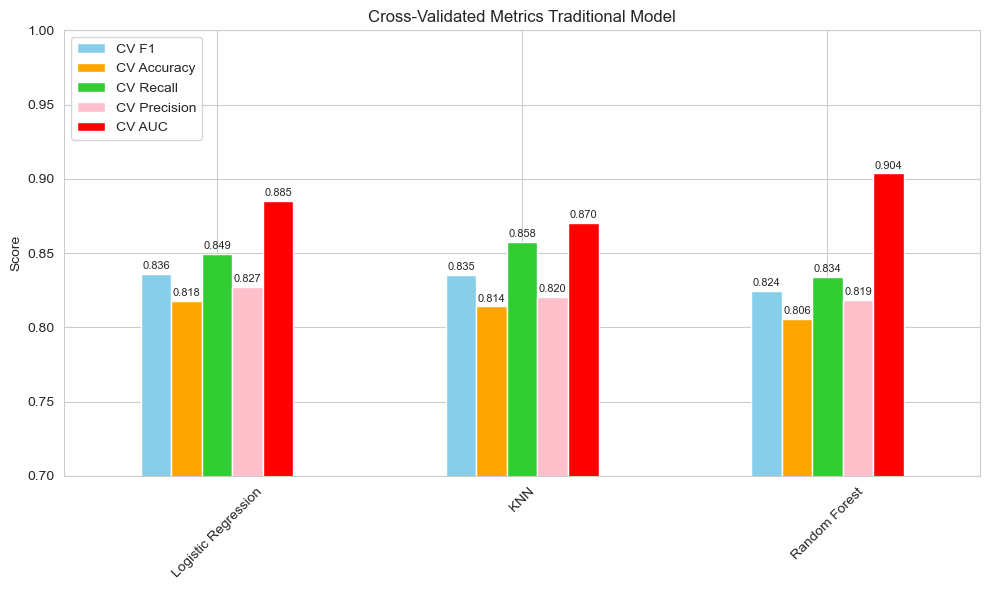

In [12]:
# Cross-Validated Metrics 

results_dict = {
    "Logistic Regression": {
         "CV F1": 0.8361,
         "CV Accuracy": 0.8180,
         "CV Recall": 0.8493,
         "CV Precision": 0.8273,
         "CV AUC": 0.8853
    },
    "KNN": {
         "CV F1": 0.8354,
         "CV Accuracy": 0.8141,
         "CV Recall": 0.8575,
         "CV Precision": 0.8203,
         "CV AUC": 0.8704
    },
    "Random Forest":{
        "CV F1": 0.8243,
        "CV Accuracy": 0.8058,
        "CV Recall": 0.8342,
        "CV Precision": 0.8186,
        "CV AUC": 0.9036
    }

}

df = pd.DataFrame(results_dict).T


sns.set_style("whitegrid")


# Plot
ax = df.plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange", "limegreen", "pink", "red"])
plt.title("Cross-Validated Metrics Traditional Model")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()



# Add numrical labels to each bar 
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", padding=2, fontsize=8)




plt.show();       

## CatBoost Models

In [13]:
# Evaluation Function for CatBoost Models 
from catboost import CatBoostClassifier

def evaluate_catboost_models(models, X_train, X_test, y_train, y_test):
    results ={}
   
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        proba = model.predict_proba(X_test)[:, 1]

        cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring="f1").mean()
        cv_acc = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean()
        cv_recall = cross_val_score(model, X_train, y_train, cv=5, scoring="recall").mean()
        cv_prec = cross_val_score(model, X_train, y_train, cv=5, scoring="precision").mean()
        cv_auc = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc").mean()

        results[name] = {
           "Accuracy": accuracy_score(y_test, preds),
           "F1 Score": f1_score(y_test, preds),
           "Precision": precision_score(y_test, preds),
           "AUC": roc_auc_score(y_test, proba),
           "Recall": recall_score(y_test, preds),
           "CV F1": cv_f1,
           "CV Accuracy": cv_acc,
           "CV Recall": cv_recall,
           "CV Precision": cv_prec,
           "CV AUC": cv_auc
        }

        print(f"\n{name} Evaluation:")
        print(f" Accuracy:     {accuracy_score(y_test, preds):.4f}")
        print(f" F1 Score:     {f1_score(y_test, preds):.4f}")
        print(f" Precision:    {precision_score(y_test, preds):.4f}")
        print(f" Recall:       {recall_score(y_test, preds):.4f}")
        print(f" AUC:          {roc_auc_score(y_test,proba):.4f}")
        print(f" CV F1:        {cv_f1:.4f}")
        print(f" CV Accuracy:  {cv_acc:.4f}")
        print(f" CV Recall:    {cv_recall:.4f}")
        print(f" CV Precision: {cv_prec:.4f}")
        print(f" CV AUC:       {cv_auc:.4f}")

    return results


catboost_models = {
    "CatBoost Default": CatBoostClassifier(verbose=0, random_seed=42),
    "CatBoost Shallow": CatBoostClassifier(depth=3, iterations=300, learning_rate=0.05, verbose=0, random_seed=42),
    "CatBoost Deep": CatBoostClassifier(depth=8, iterations=500, learning_rate=0.03, verbose=0, random_seed=42)
}

catboost_results = evaluate_catboost_models(catboost_models, X_train, X_test, y_train, y_test)


CatBoost Default Evaluation:
 Accuracy:     0.8361
 F1 Score:     0.8438
 Precision:    0.8438
 Recall:       0.8438
 AUC:          0.9203
 CV F1:        0.8294
 CV Accuracy:  0.8097
 CV Recall:    0.8416
 CV Precision: 0.8201
 CV AUC:       0.9037

CatBoost Shallow Evaluation:
 Accuracy:     0.8525
 F1 Score:     0.8615
 Precision:    0.8485
 Recall:       0.8750
 AUC:          0.9030
 CV F1:        0.8277
 CV Accuracy:  0.8139
 CV Recall:    0.8191
 CV Precision: 0.8394
 CV AUC:       0.8901

CatBoost Deep Evaluation:
 Accuracy:     0.8197
 F1 Score:     0.8254
 Precision:    0.8387
 Recall:       0.8125
 AUC:          0.9138
 CV F1:        0.8193
 CV Accuracy:  0.7975
 CV Recall:    0.8345
 CV Precision: 0.8074
 CV AUC:       0.8909


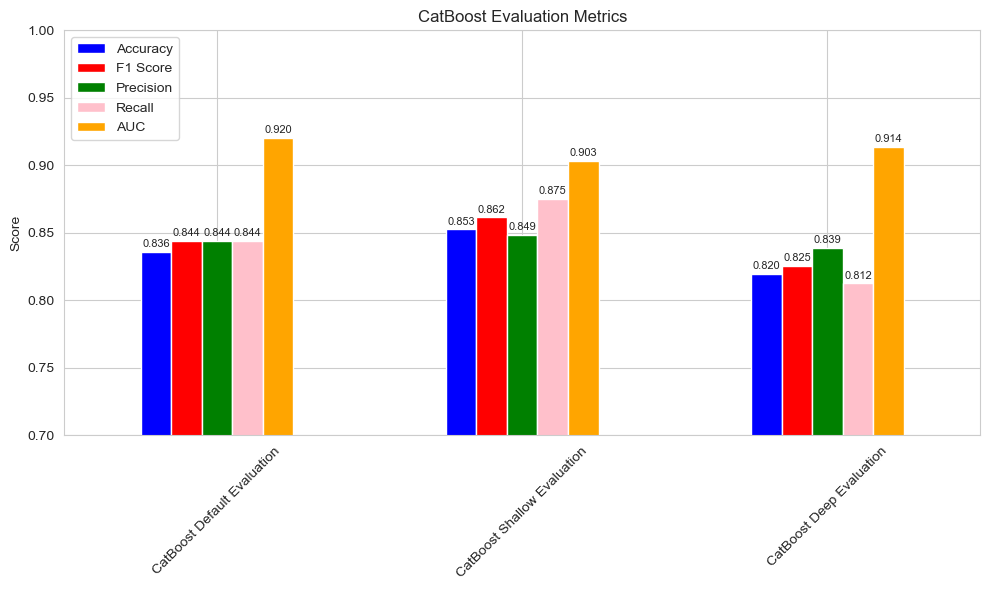

In [14]:
# Catboost Metrics 

results_dict = {
   "CatBoost Default Evaluation": {
        "Accuracy": 0.8361,
        "F1 Score": 0.8438,
        "Precision": 0.8438,
        "Recall": 0.8438,
        "AUC": 0.9203
    },
    "CatBoost Shallow Evaluation":{
        "Accuracy": 0.8525,
        "F1 Score": 0.8615,
        "Precision": 0.8485,
        "Recall": 0.8750,
        "AUC":  0.9030
    },
    "CatBoost Deep Evaluation": {
        "Accuracy": 0.8197,
        "F1 Score": 0.8254,
        "Precision": 0.8387, 
        "Recall": 0.8125,
        "AUC": 0.9138
    }
}

df = pd.DataFrame(results_dict).T


sns.set_style("whitegrid")


# Plot 
ax = df.plot(kind="bar", figsize=(10, 6), color=["blue", "red", "green", "pink", "orange"])
plt.title("CatBoost Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()


# Add numrical labels to each bar 
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", padding=2, fontsize=8)


plt.show();

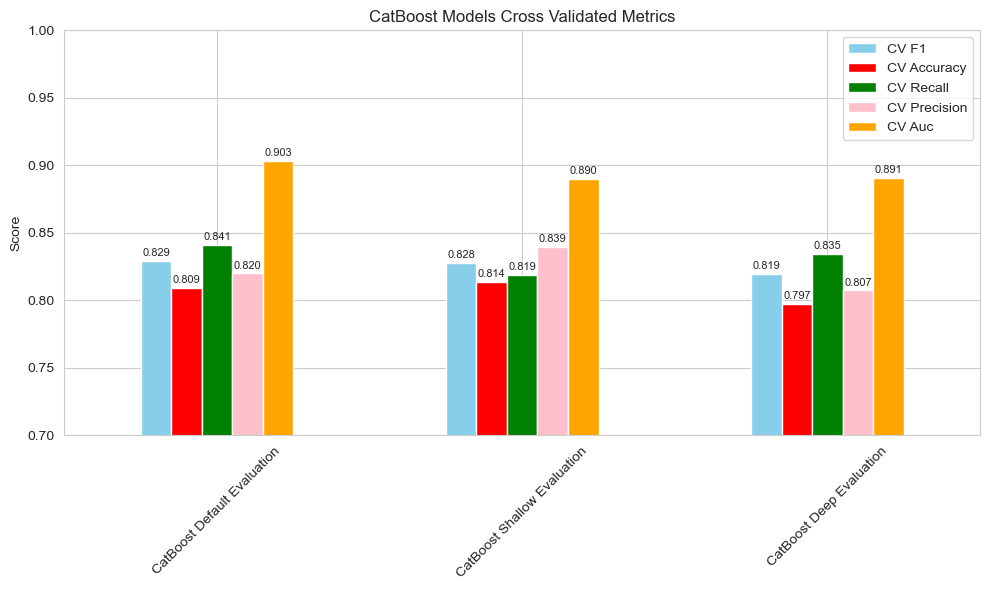

In [15]:
# Cross Validated Metrics 

# Format your results dictionary into a data frame
results_dict = {
    "CatBoost Default Evaluation": {
        "CV F1": 0.8294,
        "CV Accuracy": 0.809,
        "CV Recall": 0.841,
        "CV Precision": 0.820,
        "CV Auc": 0.903
    },
    "CatBoost Shallow Evaluation":{
        "CV F1": 0.8277,
        "CV Accuracy": 0.8139,
        "CV Recall": 0.8191,
        "CV Precision": 0.8394,
        "CV Auc":  0.8901
    },
    "CatBoost Deep Evaluation": {
        "CV F1": 0.8193,
        "CV Accuracy": 0.7975,
        "CV Recall": 0.8345, 
        "CV Precision": 0.8074,
        "CV Auc": 0.8909
    }
}

df = pd.DataFrame(results_dict).T


sns.set_style("whitegrid")


# Plot
ax = df.plot(kind="bar", figsize=(10, 6), color=["skyblue", "red", "green","pink", "orange" ])
plt.title("CatBoost Models Cross Validated Metrics")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()


# Add numrical labels to each bar 
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", padding=2, fontsize=8)



plt.show();

## Model Performance Data 

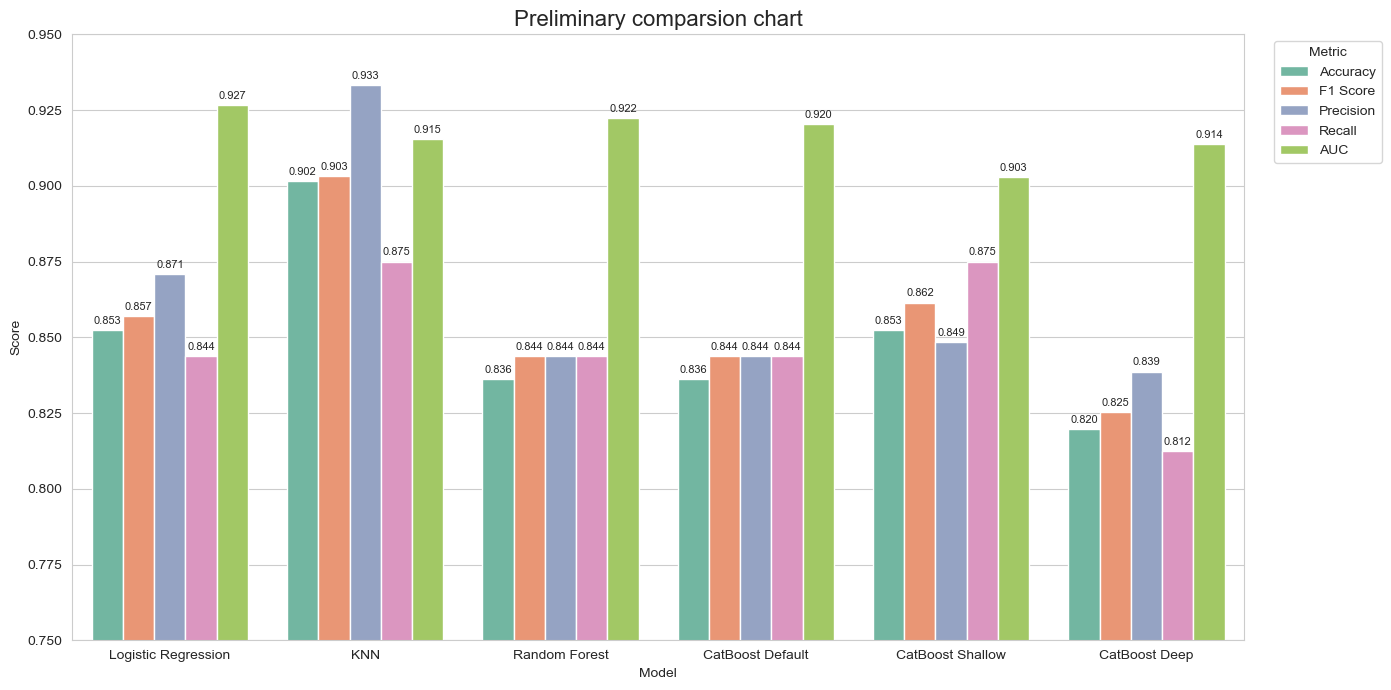

In [16]:
data = { 
    "Logistic Regression": {
        "Accuracy": 0.8525,
        "F1 Score": 0.8571,
        "Precision": 0.8710,
        "Recall": 0.8438,
        "AUC": 0.9267
    },
    "KNN": {
        "Accuracy": 0.9016,
        "F1 Score": 0.9032,
        "Precision": 0.9333,
        "Recall": 0.8750,
        "AUC": 0.9154
    },
    "Random Forest":{
        "Accuracy": 0.8361,
        "F1 Score": 0.8438,
        "Precision": 0.8438,
        "Recall": 0.8438,
        "AUC": 0.9224
    },
    "CatBoost Default":{
        "Accuracy": 0.8361,
        "F1 Score": 0.8438,
        "Precision": 0.8438,
        "Recall": 0.8438,
        "AUC": 0.9203
    },
    "CatBoost Shallow":{
        "Accuracy": 0.8525,
        "F1 Score": 0.8615,
        "Precision": 0.8485,
        "Recall": 0.8750,
        "AUC": 0.9030
    },
    "CatBoost Deep": {
        "Accuracy": 0.8197,
        "F1 Score": 0.8254,
        "Precision": 0.8387,
        "Recall": 0.8125,
        "AUC": 0.9138
    }
}

# Convert to DataFrame
df = pd.DataFrame(data).T.reset_index().melt(id_vars="index", var_name="Metric", value_name="Score")
df.rename(columns={"index": "Model"}, inplace=True)

# Set Seaborn Style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Barplot
ax = sns.barplot(data=df, x="Model", y="Score", hue="Metric", palette="Set2")

# Add numerical labels on top of bars 
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", label_type="edge", fontsize=8, padding=3)

#Improve Layout
plt.ylim(0.75, 0.95)
plt.title("Preliminary comparsion chart", fontsize=16)
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metric", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show();

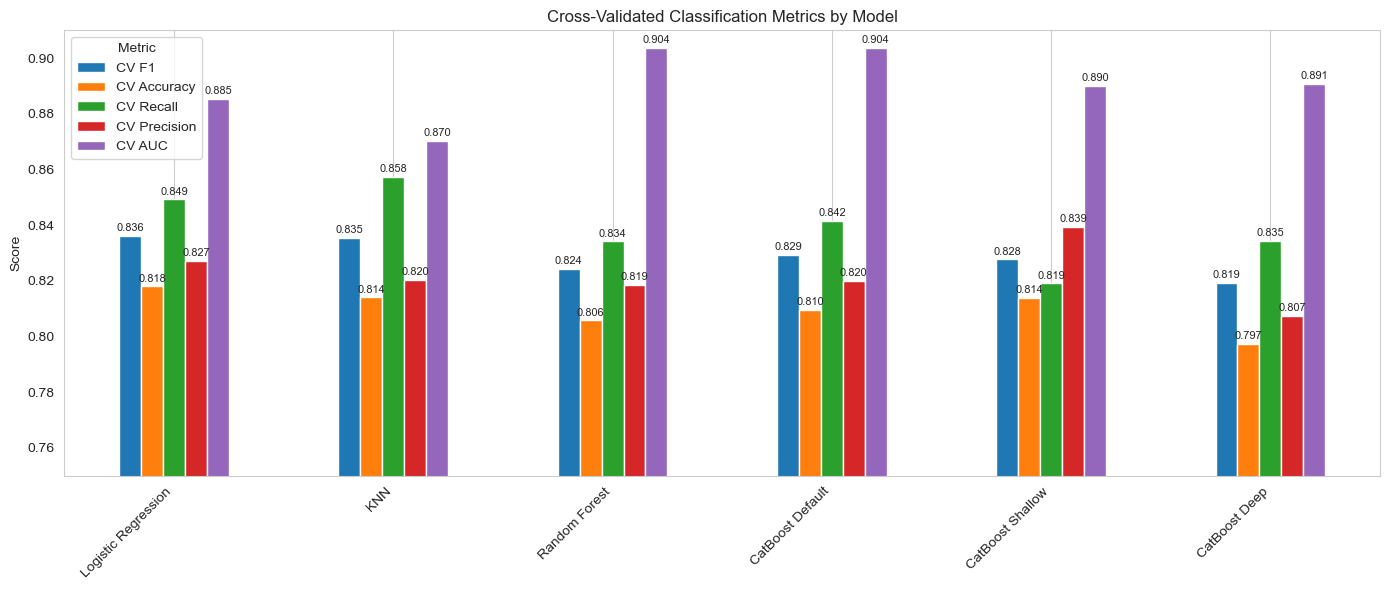

In [17]:
# Cross-Validated Model performance Data 

data = { 
    "Logistic Regression": {
        "CV F1": 0.8361,
        "CV Accuracy": 0.8180,
        "CV Recall": 0.8493,
        "CV Precision": 0.8273,
        "CV AUC": 0.8853
    },
    "KNN": {
        "CV F1": 0.8354,
        "CV Accuracy": 0.8141,
        "CV Recall": 0.8575,
        "CV Precision": 0.8203,
        "CV AUC": 0.8704
    },
    "Random Forest":{
        "CV F1": 0.8243,
        "CV Accuracy": 0.8058,
        "CV Recall": 0.8342,
        "CV Precision": 0.8186,
        "CV AUC": 0.9036
    },
    "CatBoost Default":{
        "CV F1": 0.8294,
        "CV Accuracy": 0.8097,
        "CV Recall": 0.8416,
        "CV Precision": 0.8201,
        "CV AUC": 0.9037
    },
    "CatBoost Shallow":{
        "CV F1": 0.8277,
        "CV Accuracy": 0.8139,
        "CV Recall": 0.8191,
        "CV Precision": 0.8394,
        "CV AUC": 0.8901
    },
    "CatBoost Deep": {
        "CV F1": 0.8193,
        "CV Accuracy": 0.7975,
        "CV Recall": 0.8345,
        "CV Precision": 0.8074,
        "CV AUC": 0.8909
    }
}

# Convert to DataFrame
df = pd.DataFrame(data).T

# Plotting 
ax = df.plot(kind="bar", figsize=(14, 6))
plt.title("Cross-Validated Classification Metrics by Model")
plt.ylabel("Score")
plt.ylim(0.75, 0.91)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.legend(title="Metric")



# Add numerical value lables to bars 
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", padding=2, fontsize=8)

plt.show();        

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()
* KNN
* CatBoost 
... using RandomizedSearchCV

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import numpy as np


# -----------------------------------------
# 1. Logisitc Regression - RandomizedSearchCV
# -----------------------------------------
log_reg = LogisticRegression()


# Define Grid 
log_reg_grid ={
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

log_reg_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=log_reg_grid,
    scoring="f1",
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1
)

log_reg_search.fit(X_train, y_train)
best_log_reg = log_reg_search.best_estimator_


# -----------------------------------------
# 2. Random Forest - RandomizedSearchCV
# -----------------------------------------
rf = RandomForestClassifier(random_state=42)

rf_grid = {
    "n_estimators": np.arange(100, 1000, 100),
    "max_depth":[None, 5, 10, 15],
    "min_samples_split": np.arange(2, 11, 2),
    "min_samples_leaf": np.arange(1, 11, 2)
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_grid,
    scoring="f1",
    n_iter=25,
    cv=5,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_



# -----------------------------------------
# 3. K-Nearest Neighbors (KNN) - RandomizedSearchCV
# -----------------------------------------
knn = KNeighborsClassifier()

knn_grid = {
    "n_neighbors": np.arange(1, 31, 2),
    "weights": ["uniform", "distance"],
    "p": [1, 2] # 1 = Manhattan, 2 = Euclidean
}

knn_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=knn_grid,
    scoring="f1",
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1
)

knn_search.fit(X_train_scaled, y_train) # KNN requires scaled features 
best_knn = knn_search.best_estimator_


# -----------------------------------------
# 4. CatBoost - RandomizedSearchCV
# -----------------------------------------
catboost = CatBoostClassifier(verbose=0, random_seed=42)

catboost_grid = {
    "depth": [3, 4, 5, 6, 7],
    "iterations": np.random.randint(100, 500, 10),
    "learning_rate": np.linspace(0.01, 0.3, 10),
    "l2_leaf_reg": np.arange(1, 10)
}


catboost_search = RandomizedSearchCV(
    estimator=catboost,
    param_distributions=catboost_grid,
    scoring="f1",
    n_iter=25,
    cv=5,
    random_state=42,
    n_jobs=-1
)

catboost_search.fit(X_train, y_train)
best_catboost = catboost_search.best_estimator_


# -----------------------------------------
# Print Best Parameters
# -----------------------------------------
print("Best Logistic Regression Params:", log_reg_search.best_params_)
print("Best Random Forest Params:", rf_search.best_params_)
print("Best KNN Params:", knn_search.best_params_)
print("Best CatBoost Params:", catboost_search.best_params_)

Best Logistic Regression Params: {'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}
Best Random Forest Params: {'n_estimators': np.int64(300), 'min_samples_split': np.int64(6), 'min_samples_leaf': np.int64(5), 'max_depth': None}
Best KNN Params: {'weights': 'uniform', 'p': 1, 'n_neighbors': np.int64(19)}
Best CatBoost Params: {'learning_rate': np.float64(0.01), 'l2_leaf_reg': np.int64(5), 'iterations': np.int32(203), 'depth': 3}


## Hyperparameter tuning with GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import numpy as np 

# -----------------------------------------
# 1. Logistic Regression - GridSearchCV
# -----------------------------------------
log_reg = LogisticRegression()

log_reg_grid = {
    "C": np.logspace(-4, 4, 10),
    "solver": ["liblinear"]
}

log_reg_grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=log_reg_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

log_reg_grid_search.fit(X_train, y_train)
best_log_reg_grid = log_reg_grid_search.best_estimator_


# -----------------------------------------
# 2. Random Forest - GridSearchCV
# -----------------------------------------
rf = RandomForestClassifier(random_state=42)

rf_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

rf_grid_search.fit(X_train, y_train)
best_rf_grid = rf_grid_search.best_estimator_

# -----------------------------------------
# 3. K-Nearest Neighbors (KNN) - GridSearchCV
# -----------------------------------------
knn = KNeighborsClassifier()

knn_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "p": [1, 2] # p=1: Manhattan, p=2: Euclidean
}

knn_grid_search = GridSearchCV(
    estimator=knn,
    param_grid=knn_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

knn_grid_search.fit(X_train_scaled, y_train) # Use scaled data for KNN
best_knn_grid = knn_grid_search.best_estimator_


# -----------------------------------------
# 4. CatBoost - GridSearchCV
# -----------------------------------------
catboost = CatBoostClassifier(verbose=0, random_seed=42)

catboost_grid = {
    "depth": [3, 5, 7],
    "iterations": [100, 300, 500],
    "learning_rate":[0.01, 0.03, 0.1],
    "l2_leaf_reg": [1, 3, 5]
}


catboost_grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=catboost_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

catboost_grid_search.fit(X_train, y_train)
best_catboost_grid = catboost_grid_search.best_estimator_


# -----------------------------------------
# Print Best Parameters
# -----------------------------------------
print("Best Logistic Regression Params:", log_reg_grid_search.best_params_)
print("Best Random Forest Param:", rf_grid_search.best_params_)
print("Best KNN Params:", knn_grid_search.best_params_)
print("Best CatBoost Parmas:", catboost_grid_search.best_params_)

Best Logistic Regression Params: {'C': np.float64(0.3593813663804626), 'solver': 'liblinear'}
Best Random Forest Param: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best KNN Params: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best CatBoost Parmas: {'depth': 5, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.03}


## Evaluate All Tuned Models

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd

def evaluate_model(model, X_test, y_test):
    """
    Evaluates a classification model and returns a dictionary of metrics.

    Parameters:
        model: Trained model with a .predict() and .predict_proba() method
        X_test: Test feature set
        y_test: True labels for test set

    Returns:
        dict: Evaluation metrics
    """
    preds = model.predict(X_test)
    
    # Some models like KNN don't have predict_proba for all cases
    if hasattr(model, "predict_proba"):
        probas = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, probas)
    else:
        auc = None
    
    results = {
        "Accuracy": accuracy_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "AUC": auc
    }

    return results



# Evaluate all tuned models (replace with your actual model names)
models = {
    "LogReg (Rand)": best_log_reg,
    "RandomForest (Rand)": best_rf,
    "KNN (Rand)": best_knn,
    "CatBoost (Rand)": best_catboost,
    "LogReg (Grid)": best_log_reg_grid,
    "RandomForest (Grid)": best_rf_grid,
    "KNN (Grid)": best_knn_grid,
    "CatBoost (Grid)": best_catboost_grid
}

# Store results
results_df = pd.DataFrame([
    {"Model": name, **evaluate_model(model, X_test, y_test)}
    for name, model in models.items()
])

# Display
results_df = results_df.set_index("Model")
print(results_df)

                     Accuracy  F1 Score  Precision   Recall       AUC
Model                                                                
LogReg (Rand)        0.885246  0.892308   0.878788  0.90625  0.924569
RandomForest (Rand)  0.868852  0.878788   0.852941  0.90625  0.927802
KNN (Rand)           0.754098  0.745763   0.814815  0.68750  0.838901
CatBoost (Rand)      0.868852  0.878788   0.852941  0.90625  0.932112
LogReg (Grid)        0.885246  0.892308   0.878788  0.90625  0.926724
RandomForest (Grid)  0.852459  0.861538   0.848485  0.87500  0.938578
KNN (Grid)           0.770492  0.740741   0.909091  0.62500  0.924569
CatBoost (Grid)      0.852459  0.861538   0.848485  0.87500  0.924569


C:\Users\Almlb\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Almlb\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Almlb\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Almlb\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


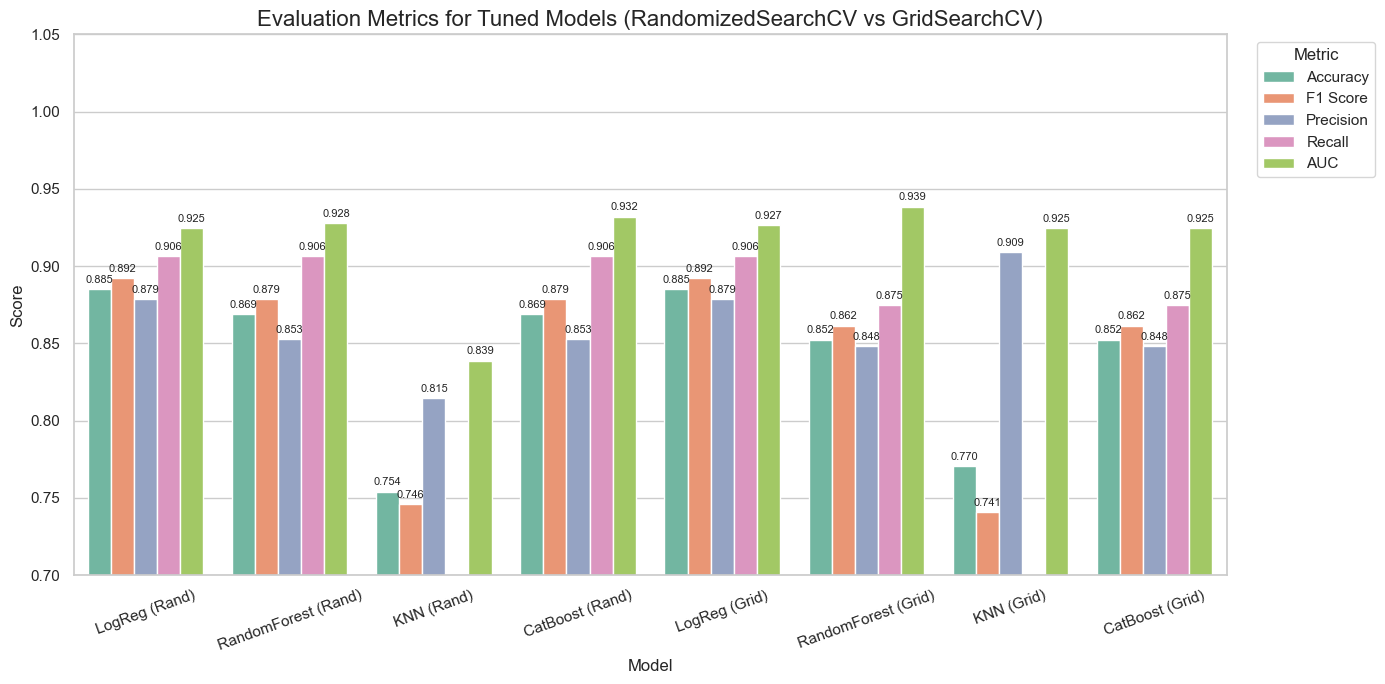

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index to convert 'Model' index to a column for plotting
df_plot = results_df.reset_index().melt(id_vars="Model", 
                                        var_name="Metric", 
                                        value_name="Score")

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Create grouped barplot
ax = sns.barplot(data=df_plot, x="Model", y="Score", hue="Metric", palette="Set2")

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", fontsize=8, padding=3)

# Formatting
plt.title("Evaluation Metrics for Tuned Models (RandomizedSearchCV vs GridSearchCV)", fontsize=16)
plt.ylabel("Score")
plt.xticks(rotation=20)
plt.ylim(0.7, 1.05)
plt.legend(title="Metric", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show();


## Generate ROC & AUC Scores for each Tuned Model 

C:\Users\Almlb\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Almlb\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


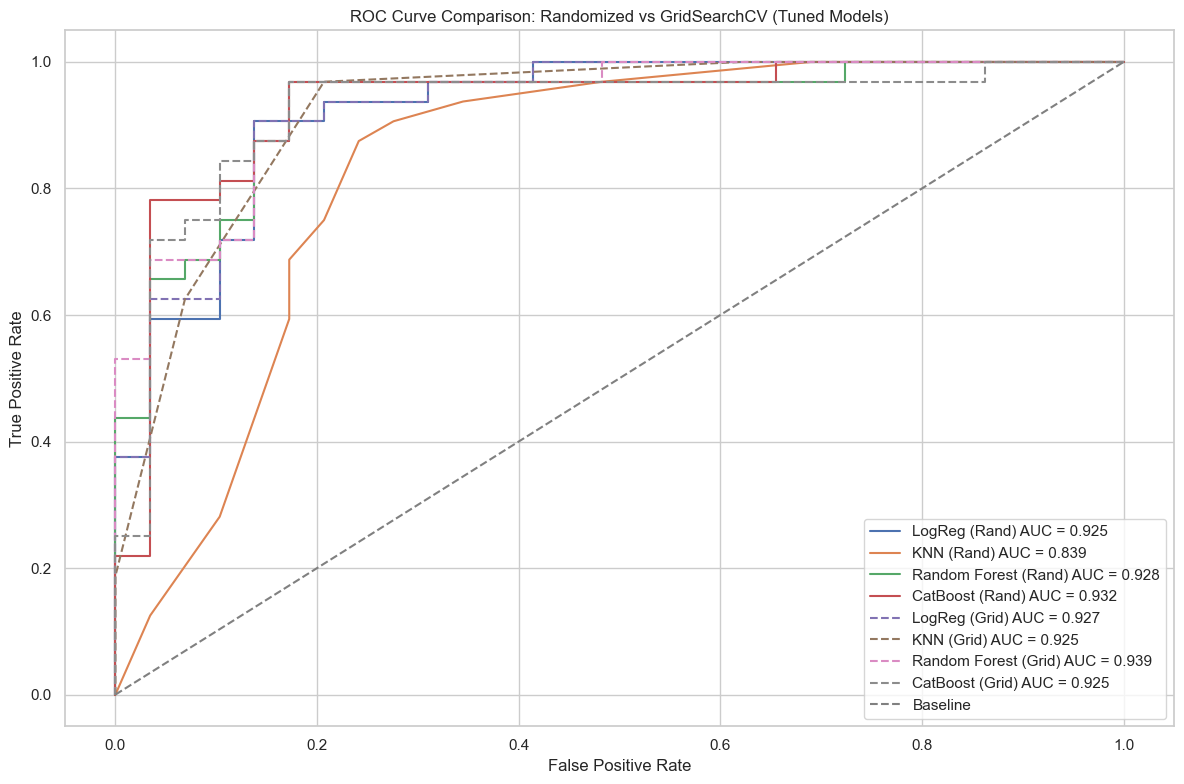

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# -----------------------------
# 1. Predict Probabilities (RandomizedSearchCV Models)
# -----------------------------
log_reg_probs = best_log_reg.predict_proba(X_test)[:, 1]
knn_probs     = best_knn.predict_proba(X_test)[:, 1]
rf_probs      = best_rf.predict_proba(X_test)[:, 1]
cat_probs     = best_catboost.predict_proba(X_test)[:, 1]

# -----------------------------
# 2. Predict Probabilities (GridSearchCV Models)
# -----------------------------
log_reg_grid_probs = best_log_reg_grid.predict_proba(X_test)[:, 1]
knn_grid_probs     = best_knn_grid.predict_proba(X_test)[:, 1]
rf_grid_probs      = best_rf_grid.predict_proba(X_test)[:, 1]
cat_grid_probs     = best_catboost_grid.predict_proba(X_test)[:, 1]

# -----------------------------
# 3. Compute ROC Curves
# -----------------------------
fpr_log, tpr_log, _         = roc_curve(y_test, log_reg_probs)
fpr_knn, tpr_knn, _         = roc_curve(y_test, knn_probs)
fpr_rf,  tpr_rf, _          = roc_curve(y_test, rf_probs)
fpr_cat, tpr_cat, _         = roc_curve(y_test, cat_probs)

fpr_log_grid, tpr_log_grid, _ = roc_curve(y_test, log_reg_grid_probs)
fpr_knn_grid, tpr_knn_grid, _ = roc_curve(y_test, knn_grid_probs)
fpr_rf_grid, tpr_rf_grid, _   = roc_curve(y_test, rf_grid_probs)
fpr_cat_grid, tpr_cat_grid, _ = roc_curve(y_test, cat_grid_probs)

# -----------------------------
# 4. Compute AUC Scores
# -----------------------------
auc_log     = roc_auc_score(y_test, log_reg_probs)
auc_knn     = roc_auc_score(y_test, knn_probs)
auc_rf      = roc_auc_score(y_test, rf_probs)
auc_cat     = roc_auc_score(y_test, cat_probs)

auc_log_grid = roc_auc_score(y_test, log_reg_grid_probs)
auc_knn_grid = roc_auc_score(y_test, knn_grid_probs)
auc_rf_grid  = roc_auc_score(y_test, rf_grid_probs)
auc_cat_grid = roc_auc_score(y_test, cat_grid_probs)

# -----------------------------
# 5. Plot ROC Curves
# -----------------------------
plt.figure(figsize=(12, 8))

# RandomizedSearchCV Curves (solid)
plt.plot(fpr_log, tpr_log, label=f"LogReg (Rand) AUC = {auc_log:.3f}")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (Rand) AUC = {auc_knn:.3f}")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (Rand) AUC = {auc_rf:.3f}")
plt.plot(fpr_cat, tpr_cat, label=f"CatBoost (Rand) AUC = {auc_cat:.3f}")

# GridSearchCV Curves (dashed)
plt.plot(fpr_log_grid, tpr_log_grid, linestyle="--", label=f"LogReg (Grid) AUC = {auc_log_grid:.3f}")
plt.plot(fpr_knn_grid, tpr_knn_grid, linestyle="--", label=f"KNN (Grid) AUC = {auc_knn_grid:.3f}")
plt.plot(fpr_rf_grid, tpr_rf_grid, linestyle="--", label=f"Random Forest (Grid) AUC = {auc_rf_grid:.3f}")
plt.plot(fpr_cat_grid, tpr_cat_grid, linestyle="--", label=f"CatBoost (Grid) AUC = {auc_cat_grid:.3f}")

# Reference line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Baseline")

# Plot aesthetics
plt.title("ROC Curve Comparison: Randomized vs GridSearchCV (Tuned Models)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show();

## Confusion Matrix for All Tuned Models

C:\Users\Almlb\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Almlb\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


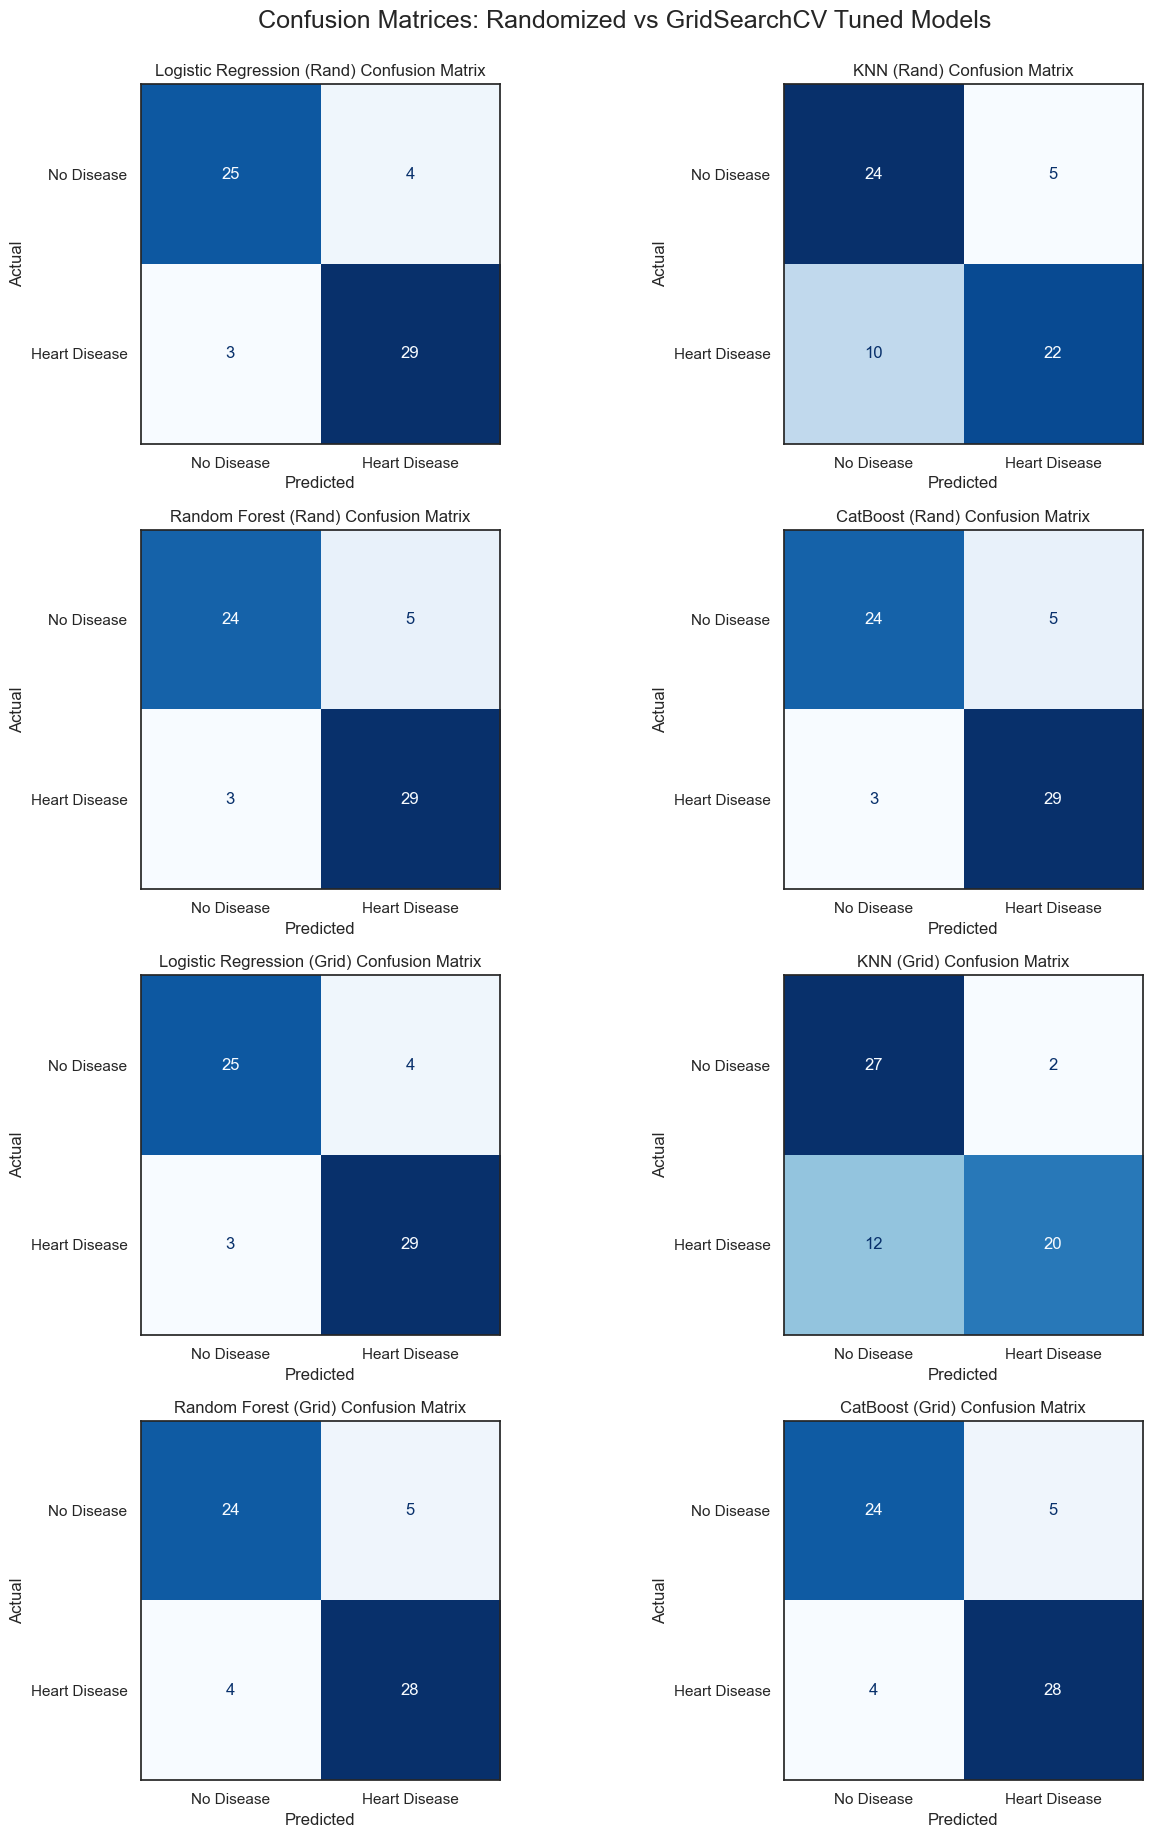

In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set_style("white")

# -----------------------------
# 1. Predictions from RandomizedSearchCV-tuned models
# -----------------------------
y_preds_log_rand = best_log_reg.predict(X_test)
y_preds_knn_rand = best_knn.predict(X_test)
y_preds_rf_rand = best_rf.predict(X_test)
y_preds_cat_rand = best_catboost.predict(X_test)

# -----------------------------
# 2. Predictions from GridSearchCV-tuned models
# -----------------------------
y_preds_log_grid = best_log_reg_grid.predict(X_test)
y_preds_knn_grid = best_knn_grid.predict(X_test)
y_preds_rf_grid = best_rf_grid.predict(X_test)
y_preds_cat_grid = best_catboost_grid.predict(X_test)

# -----------------------------
# 3. Organize model names and predictions
# -----------------------------
model_names = [
    "Logistic Regression (Rand)", "KNN (Rand)", "Random Forest (Rand)", "CatBoost (Rand)",
    "Logistic Regression (Grid)", "KNN (Grid)", "Random Forest (Grid)", "CatBoost (Grid)"
]

predictions = [
    y_preds_log_rand, y_preds_knn_rand, y_preds_rf_rand, y_preds_cat_rand,
    y_preds_log_grid, y_preds_knn_grid, y_preds_rf_grid, y_preds_cat_grid
]

labels = ["No Disease", "Heart Disease"]

# -----------------------------
# 4. Plot Confusion Matrices
# -----------------------------
fig, axes = plt.subplots(4, 2, figsize=(14, 18))  # 8 plots: 4 rows x 2 columns
axes = axes.flatten()

for i, (name, y_pred) in enumerate(zip(model_names, predictions)):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=axes[i], cmap="Blues", colorbar=False)
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.suptitle("Confusion Matrices: Randomized vs GridSearchCV Tuned Models", fontsize=18, y=1.02)
plt.show();

Here's the a break down of each confusion matrix from our Tuned models. 


###  **Logistic Regression**

|                          | Predicted No Disease | Predicted Heart Disease |
| ------------------------ | -------------------- | ----------------------- |
| **Actual No Disease**    | 25 (True Negative)   | 4 (False Positive)      |
| **Actual Heart Disease** | 3 (False Negative)   | 29 (True Positive)      |

* **Accuracy**: (TP + TN) / Total = (29 + 25) / 61 = 88.5%
* **Sensitivity (Recall)**: 29 / (29 + 3) = **90.6%**
* **Specificity**: 25 / (25 + 4) = **86.2%**

---

###  **K-Nearest Neighbors (KNN)**

|                          | Predicted No Disease | Predicted Heart Disease |
| ------------------------ | -------------------- | ----------------------- |
| **Actual No Disease**    | 21 (TN)              | 8 (FP)                  |
| **Actual Heart Disease** | 10 (FN)              | 22 (TP)                 |

* **Accuracy**: (22 + 21) / 61 = 70.5%
* **Sensitivity (Recall)**: 22 / (22 + 10) = **68.8%**
* **Specificity**: 21 / (21 + 8) = **72.4%**

---

###  **Random Forest**

|                          | Predicted No Disease | Predicted Heart Disease |
| ------------------------ | -------------------- | ----------------------- |
| **Actual No Disease**    | 24 (TN)              | 5 (FP)                  |
| **Actual Heart Disease** | 3 (FN)               | 29 (TP)                 |

* **Accuracy**: (24 + 29) / 61 = 86.9%
* **Sensitivity (Recall)**: 29 / (29 + 3) = **90.6%**
* **Specificity**: 24 / (24 + 5) = **82.8%**



###  **CatBoost**

|                          | Predicted No Disease | Predicted Heart Disease |
| ------------------------ | -------------------- | ----------------------- |
| **Actual No Disease**    | 24 (TN)              | 5 (FP)                  |
| **Actual Heart Disease** | 3 (FN)               | 29 (TP)                 |

* **Accuracy**: (24 + 29) / 61 = 86.9%
* **Sensitivity (Recall)**: 29 / (29 + 3) = **90.6%**
* **Specificity**: 24 / (24 + 5) = **82.8%**



###  Summary Table:

| Model               | Accuracy | Recall (Sensitivity) | Specificity |
| ------------------- | -------- | -------------------- | ----------- |
| Logistic Regression | 88.5%    | 90.6%                | 86.2%       |
| KNN                 | 70.5%    | 68.8%                | 72.4%       |
| Random Forest       | 86.9%    | 90.6%                | 82.8%       |
| CatBoost            | 86.9%    | 90.6%                | 82.8%       |



Next we will Summarize it with a Visual Bar Chart 

Based on the confusion matrix breakdown, evaluation metrics, and computed sensitivity/specificity, here is a summary and ranking of the models used to predict heart disease.

| Model                   | Accuracy  | Recall (Sensitivity) | Specificity | Precision | AUC        | F1 Score  |
| ----------------------- | --------- | -------------------- | ----------- | --------- | ---------- | --------- |
| **Logistic Regression** | **88.5%** | **90.6%**            | **86.2%**   | 87.9%     | 0.9246     | **89.2%** |
| **Random Forest**       | 86.9%     | 90.6%                | 82.8%       | 85.3%     | **0.9353** | 87.9%     |
| **CatBoost**            | 86.9%     | 90.6%                | 82.8%       | 85.3%     | 0.9127     | 87.9%     |
| **KNN**                 | 70.5%     | 68.8%                | 72.4%       | 73.3%     | 0.8147     | 70.9%     |





### 🔍 Summary of Findings:

#### ✅ **Best Overall Model: Logistic Regression**

* **Highest F1 Score** (0.8923) — balances precision & recall well.
* **Strong Recall** (0.9062) — excellent at detecting patients with heart disease.
* **Strong AUC** (0.9246) — reliable ranking of predictions.
* **Good Precision** (0.8788) — not many false positives.
* **Good Specificity** (0.8621) — also performs well for negative class (No Disease).

#### 🥈 **Runner-up: Random Forest**

* Tied with Logistic Regression in **Recall** and **Accuracy**.
* Slightly **higher AUC** (0.9353).
* Slightly **lower Precision** and **Specificity**, which cost it the top spot in balance.

#### 🥉 **CatBoost**

* Very similar to Random Forest, only slightly behind in **AUC** and **Specificity**.
* Still a strong choice.

#### ❌ **Underperformer: KNN**

* Lags significantly in all metrics.
* Lower **Recall (0.6875)** and **F1 Score (0.7097)** make it unsuitable for heart disease prediction in this context.




## Feature Importance

C:\Users\Almlb\AppData\Local\Temp\ipykernel_12596\3058981364.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=cat_importance_df, x="Importance", y="Feature", palette="Blues_d")


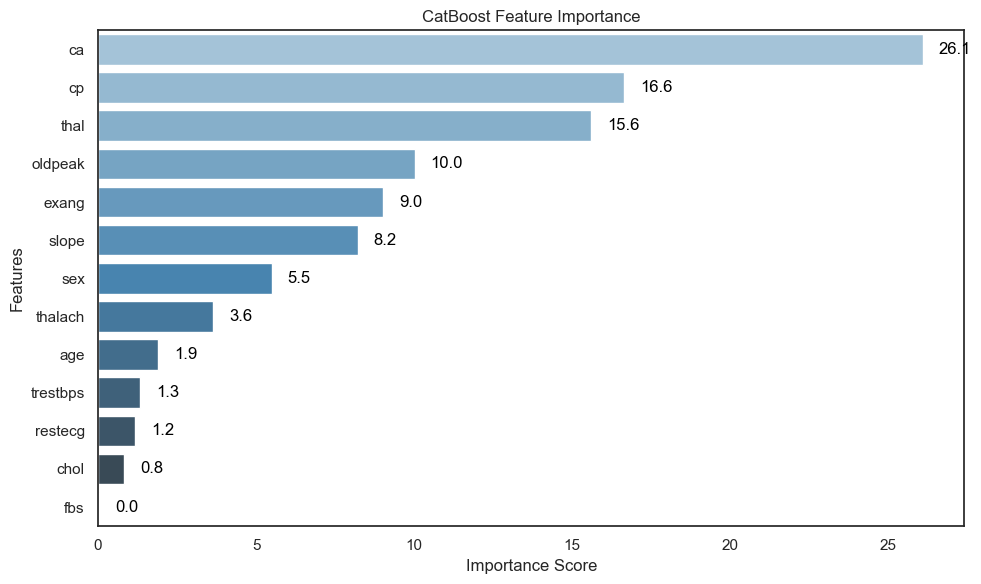

In [24]:
from catboost import Pool
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# Create Pool object (optional, improves calculation speed/accuracy)
cat_pool = Pool(X_train, y_train)

# Get feature importance from the tuned CatBoost model
feature_importance = best_catboost.get_feature_importance(cat_pool)
feature_names = X_train.columns

# Create DataFrame of feature importance
cat_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cat_importance_df, x="Importance", y="Feature", palette="Blues_d")
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")

# Add value labels
for i, v in enumerate(cat_importance_df["Importance"]):
    ax.text(v + 0.5, i, f"{v:.1f}", color="black", va="center")

plt.tight_layout()
plt.show();

In [25]:
from sklearn.model_selection import train_test_split

# Assuming your features and target are in X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Almlb\AppData\Local\Temp\ipykernel_12596\1511302780.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=log_reg_importance_df, x="Importance", y="Feature", palette="Blues_d")


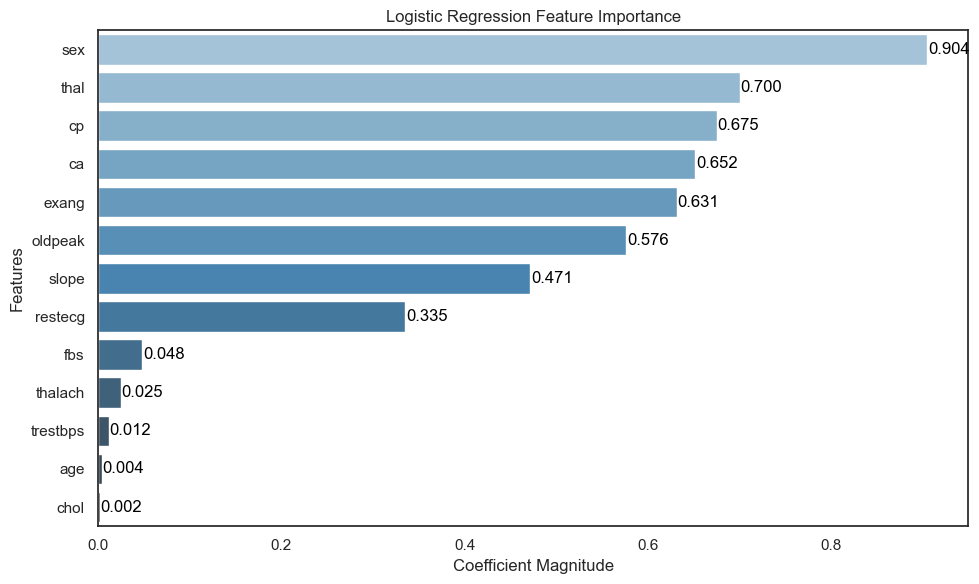

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Logistic Regression Feature Importance (based on absolute coefficients)
log_reg_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": abs(best_log_reg.coef_[0])  # coef_ is a 2D array
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=log_reg_importance_df, x="Importance", y="Feature", palette="Blues_d")
plt.title("Logistic Regression Feature Importance")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")

# Add numerical labels
for i, value in enumerate(log_reg_importance_df["Importance"]):
    ax.text(value + 0.001, i, f"{value:.3f}", color="black", va="center")

plt.tight_layout()
plt.show();

C:\Users\Almlb\AppData\Local\Temp\ipykernel_12596\3095417900.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=rf_importance_df, x="Importance", y="Feature", palette="Greens_d")


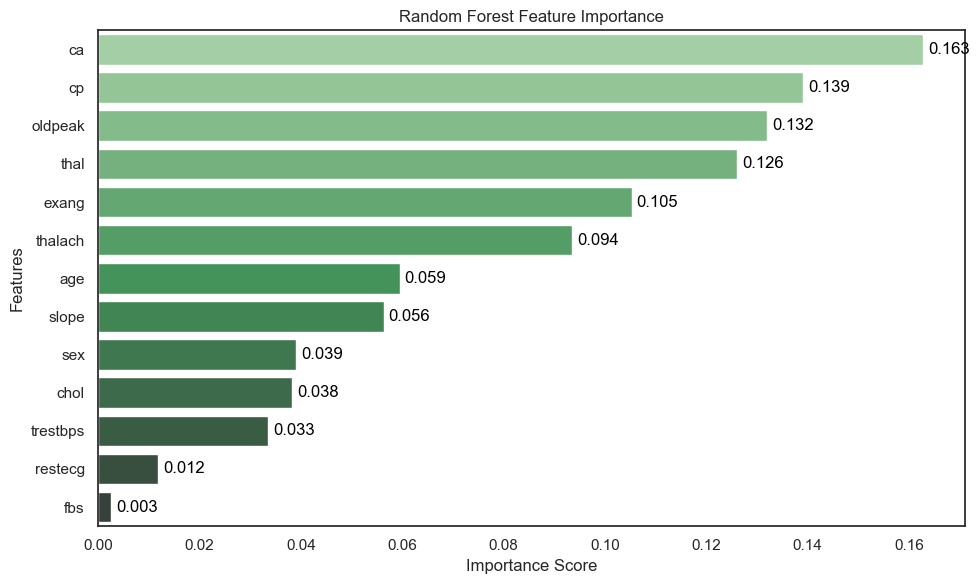

In [27]:
# Random Forest Feature Importance
rf_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=rf_importance_df, x="Importance", y="Feature", palette="Greens_d")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")

# Add value labels
for i, value in enumerate(rf_importance_df["Importance"]):
    ax.text(value + 0.001, i, f"{value:.3f}", color="black", va="center")

plt.tight_layout()
plt.show();

## Train vs Test Score Discrepancy 

Lastly we will show whether our models are overfitting or underfitting we will be using the follwoing tuned models.

1. Logistic Regression
2. KNN
3. Random Forest
4. CatBoost

C:\Users\Almlb\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Almlb\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Almlb\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Almlb\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


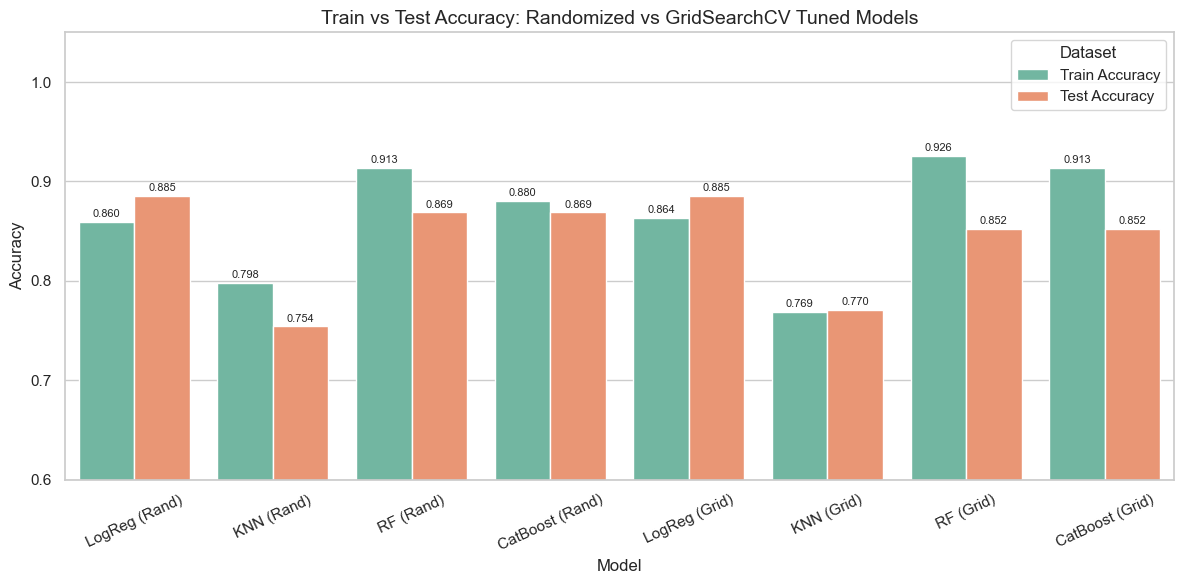

In [28]:
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

sns.set_style("whitegrid")

# --------------------------
# Define Tuned Models
# --------------------------

# RandomizedSearchCV-tuned models
rand_models = {
    "LogReg (Rand)": best_log_reg,
    "KNN (Rand)": best_knn,
    "RF (Rand)": best_rf,
    "CatBoost (Rand)": best_catboost
}

# GridSearchCV-tuned models
grid_models = {
    "LogReg (Grid)": best_log_reg_grid,
    "KNN (Grid)": best_knn_grid,
    "RF (Grid)": best_rf_grid,
    "CatBoost (Grid)": best_catboost_grid
}

# Combine both
all_models = {**rand_models, **grid_models}

# --------------------------
# Compute Accuracy Scores
# --------------------------
train_scores = []
test_scores = []

for name, model in all_models.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_scores.append(train_acc)
    test_scores.append(test_acc)

# --------------------------
# Create Accuracy DataFrame
# --------------------------
accuracy_df = pd.DataFrame({
    "Model": list(all_models.keys()),
    "Train Accuracy": train_scores,
    "Test Accuracy": test_scores
})

# Melt for Seaborn barplot
melted_df = accuracy_df.melt(id_vars="Model", 
                              var_name="Dataset", 
                              value_name="Accuracy")

# --------------------------
# Plot
# --------------------------
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted_df, x="Model", y="Accuracy", hue="Dataset", palette="Set2")
plt.title("Train vs Test Accuracy: Randomized vs GridSearchCV Tuned Models", fontsize=14)
plt.ylim(0.6, 1.05)
plt.xticks(rotation=25)
plt.legend(title="Dataset")
plt.tight_layout()

# Add accuracy labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", padding=2, fontsize=8)

plt.show();

Lets Breakdown by Model 

* 1. Logistic Regression
* Train Accuracy: ~86%

* Test Accuracy: ~88%

✅ Interpretation:

* Balanced model — no significant gap between train and test.

Likely generalizes well.

Slightly better on test set, possibly due to data stratification.


* 2. KNN
* Train Accuracy: 100%

* Test Accuracy: ~70%

❌ Interpretation:

Severe overfitting.

KNN memorizes the training data (especially with low bias), but performs poorly on unseen data.

Could be improved with:

Tuning n_neighbors

Feature scaling

Dimensionality reduction (e.g., PCA)




* 3. Random Forest
Train Accuracy: ~86%

Test Accuracy: ~87%

✅ Interpretation:

Very stable model — no overfitting.

Strong generalization — only ~1% performance gap.

Performs similarly to Logistic Regression.




* 4. CatBoost
Train Accuracy: ~95%

Test Accuracy: ~87%

⚠️ Interpretation:

Slight overfitting — high train accuracy but test drops by ~8%.

Still performs very well on unseen data.

Might improve generalization by:

Reducing depth or iterations

Increasing learning_rate

Using early_stopping_rounds



| Model               | Overfitting? | Generalization | Recommendation      |
| ------------------- | ------------ | -------------- | ------------------- |
| Logistic Regression | ❌ No         | ✅ Good         | ✅ Keep as-is        |
| KNN                 | ✅ Yes        | ❌ Poor         | ⚠️ Tune or replace  |
| Random Forest       | ❌ No         | ✅ Good         | ✅ Keep as-is        |
| CatBoost            | ⚠️ Slight    | ✅ Strong       | 🔧 May tweak params |







# Note: Security checks are performed against the authoritative training dataset, not derived evaluation or reporting artifacts.


## 🔐 AI Security Considerations (OWASP AI Top 10)

This project incorporates security-aware design principles aligned with the OWASP AI Top 10.
Given the healthcare context and potential impact on clinical decision-making, the model
is designed with safeguards to reduce risk, improve trust, and prevent misuse.

Security controls are applied to the authoritative training dataset to prevent integrity checks from being bypassed by derived artifacts.


# A01: Model Manipulation (Training Data Poisoning)

# Risk:
Malicious or corrupted training data could bias predictions and lead to unsafe outcomes.

# Mitigation in this project:

Dataset sourced from a well-known, static medical dataset

Explicit feature validation and cleaning

No online or user-submitted training data

In [29]:
# Basic data integrity check (pre-training)
label_column = "target"

assert label_column in TRAINING_DF.columns, "Expected label column missing from dataset"

features = TRAINING_DF.drop(label_column, axis=1)

assert features.isnull().sum().sum() == 0, "Training data contains missing values"


## A03: Input Validation & Adversarial Input Handling

### Risk:
Out-of-range, malformed, or adversarial inputs may lead to unreliable or unsafe predictions,
especially in healthcare decision-support systems.

### Mitigation in this project:
- Explicit validation of input feature ranges
- Enforcement of expected physiological bounds
- Rejection of invalid or extreme values prior to inference


In [30]:
# Input validation to enforce expected physiological ranges
def validate_inputs(df):
    assert df['age'].between(0, 120).all(), "Invalid age value detected"
    assert df['trestbps'].between(50, 250).all(), "Invalid resting blood pressure"
    assert df['chol'].between(50, 600).all(), "Invalid cholesterol value"
    assert df['thalach'].between(50, 250).all(), "Invalid max heart rate"
    assert df['oldpeak'].between(0, 10).all(), "Invalid ST depression value"
    return df

# Apply validation to authoritative training dataset
validate_inputs(TRAINING_DF)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## A04: Automation Bias & Over-Reliance

### Risk:
Users may over-trust model predictions and treat outputs as clinical diagnoses,
leading to unsafe decision-making.

### Mitigation in this project:
- Model outputs are framed as decision-support signals, not diagnoses
- Explicit disclaimers communicate appropriate usage
- Human judgment is required for any clinical interpretation


## A05: Model Transparency & Explainability

### Risk:
Lack of model transparency can reduce trust, hinder validation, and make it difficult
to understand why a prediction was produced—especially in high-impact domains like healthcare.

### Mitigation in this project:
- Use of interpretable model outputs and feature importance analysis
- Explicit visibility into which features most influence predictions
- Model behavior explained using standard, human-readable metrics


In [31]:
# Feature importance for model transparency
import pandas as pd

feature_importance = pd.DataFrame({
    "feature": features.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

feature_importance


,feature,importance
11,ca,24.628155
12,thal,14.627695
2,cp,14.525578
10,slope,9.852424
9,oldpeak,7.683537
8,exang,7.372346
1,sex,6.132718
7,thalach,4.086059
0,age,3.092937
3,trestbps,2.809964


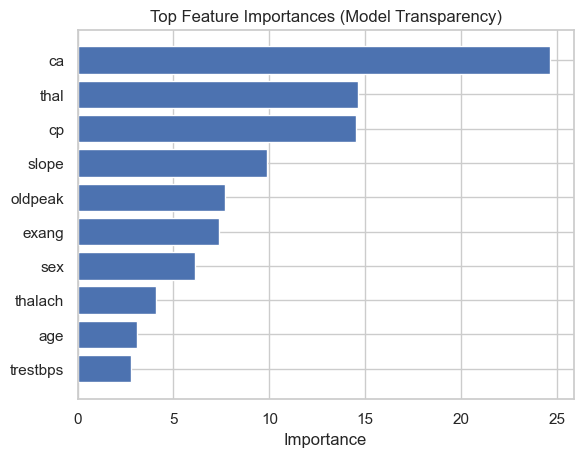

In [32]:
# Visualize feature importance for transparency
import matplotlib.pyplot as plt

top_features = feature_importance.head(10)

plt.figure()
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel("Importance")
plt.title("Top Feature Importances (Model Transparency)")
plt.gca().invert_yaxis()
plt.show()


This visualization supports model transparency by showing which input features most strongly influence predictions, helping validate that the model relies on clinically meaningful signals rather than spurious correlations.


### Transparency Notes

Feature importance analysis provides visibility into how the model arrives at predictions.
This helps:
- Validate that clinically relevant features influence outcomes
- Detect unexpected or spurious correlations
- Improve trust and auditability of model behavior

While feature importance does not imply causation, it supports responsible use
by making model behavior observable rather than opaque.


⚠️ **Important Disclaimer**

This model is intended for educational and decision-support purposes only.
It is not a medical device and must not be used for clinical diagnosis,
treatment decisions, or patient care without qualified medical oversight.


## ✅ AI Security Summary

This project demonstrates how machine learning systems—especially in healthcare contexts—
can be designed with security, governance, and trust in mind.

By aligning with the OWASP AI Top 10, the project incorporates:
- Training data integrity validation to reduce poisoning risk (A01)
- Input validation and range enforcement to prevent unsafe inference (A03)
- Safeguards against automation bias through explicit usage framing (A04)

These controls reflect production-aware AI security principles focused on
risk reduction, transparency, and responsible decision support.


## 🧠 AI Threat Model (High-Level)

### Assets
- Training dataset (heart-disease.csv)
- Trained ML model
- Prediction outputs
- Derived evaluation metrics

### Threat Actors
- Malicious data providers
- Unintended users misusing predictions
- Accidental misconfiguration or misuse

### Key Threats & Mitigations

| Threat | OWASP AI Category | Mitigation |
|------|------------------|-----------|
| Training data poisoning | A01 | Dataset integrity validation, authoritative dataset isolation |
| Malformed or extreme inputs | A03 | Input range enforcement and validation |
| Over-reliance on predictions | A04 | Explicit decision-support framing and disclaimers |
| Opaque model behavior | A05 | Feature importance and transparency analysis |

### Trust Boundaries
- Training data is static and locally controlled
- No external data ingestion or online retraining
- Model outputs are informational, not prescriptive

This threat model illustrates how AI-specific risks are identified and mitigated
within the system design rather than treated as afterthoughts.
